In [8]:
import pandas as pd
import mysql.connector as connector
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt





connection = connector.connect(user='root', password='root',
                              host="localhost",
                              database='BigDataAnalytics')

dataFrame = pd.read_sql("select * from finaldataset",con=connection)


companies = set(dataFrame["Company"])
companies = list(sorted( companies ) )

companyVsRmse = {}

for company in companies:
    companyDf = pd.read_sql("select * from finaldataset where company = " + "\""+str( company ) + "\"" ,con = connection)

    closingProces = companyDf["Adj. Close"].to_numpy()
    xTrain = []
    yTrain = []

    # plt.plot(companyDf["Adj. Close"])
    # plt.show()



    for i in range(30, closingProces.shape[0] ):
        xTrain.append(closingProces[i-30:i])
        yTrain.append(closingProces[i])

    xTrain = np.array(xTrain)
    yTrain = np.array(yTrain)
    if xTrain.shape[0]<30:
        print(company,"Cannot train on this company due to lack of data",sep ="     ")
        continue

    model = LinearRegression().fit(xTrain[0:int(0.8*xTrain.shape[0]),:],yTrain[0:int(0.8*yTrain.shape[0])])
    meanSquaredError = mean_squared_error(y_true=yTrain[int(0.8*yTrain.shape[0]):],y_pred=model.predict(xTrain[int(0.8*xTrain.shape[0]):,:]))

    rmse = meanSquaredError**0.5
    print(company,rmse,sep="   -   ")

    companyVsRmse[company] = rmse


Activision Blizzard Inc   -   1.139401711698262
Adobe Inc   -   1.8978409943288255
Advanced Micro Devices Inc   -   0.6808495858600205
Alphabet Inc   -   10.77054082455896
Amazon.com Inc   -   12.864665243709242
Amgen Inc   -   2.406394758898355
Analog Devices Inc   -   1.4023015127920428
Apple Inc   -   1.7681443191962372
Applied Materials Inc   -   0.9140276675104835
Autodesk Inc   -   2.55340983340279
Automatic Data Processing Inc   -   1.1041174257403041
Biogen Inc   -   6.640599489644165
Booking Holdings Inc     Cannot train on this company due to lack of data
Broadcom Inc   -   3.6672533418210813
CSX Corp   -   0.8832530687746861
Charter Communications Inc   -   5.3061229967499415
Cisco Systems Inc   -   0.40378424583290695
Comcast Corp   -   0.4197951287915652
Costco Wholesale Corp   -   1.8244951413347057
Exelon Corp   -   0.4015921244809104
Facebook Inc   -   2.410651437003425
Fiserv Inc   -   2.6800978716316006
Gilead Sciences Inc   -   1.605860107856252
Illumina Inc   -   5.

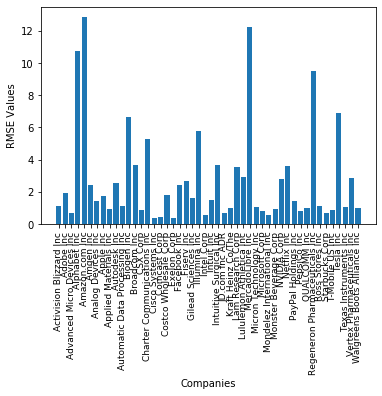

In [9]:
plt.bar(list(companyVsRmse.keys()),list(companyVsRmse.values()))
plt.xticks(rotation = 90,fontsize = 9)
plt.xlabel(xlabel="Companies")
plt.ylabel(ylabel="RMSE Values")
plt.show()

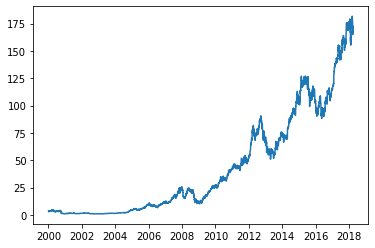

In [48]:
# you can put any company here to visualize the prediction.
companyDf = pd.read_sql("select * from finaldataset where company = " + "\""+ "Apple Inc" + "\"" ,con = connection)

closingProces = companyDf["Adj. Close"].to_numpy()
xTrain = []
yTrain = []
companyDf["Date"] = pd.to_datetime(companyDf["Date"])
plt.plot(companyDf["Date"],companyDf["Adj. Close"])
plt.show()



for i in range(30, closingProces.shape[0] ):
    xTrain.append(closingProces[i-30:i])
    yTrain.append(closingProces[i])

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
if xTrain.shape[0]<30:
    print(company,"Cannot train on this company due to lack of data",sep ="     ")
    # continue

model = LinearRegression().fit(xTrain[0:int(0.8*xTrain.shape[0]),:],yTrain[0:int(0.8*yTrain.shape[0])])
predictedValues = model.predict(xTrain[int(0.8*xTrain.shape[0]):,:])
trueValues = yTrain[int(0.8*yTrain.shape[0]):]

meanSquaredError = mean_squared_error(y_true=trueValues,y_pred=predictedValues)


datesOfTheStockPredicted = companyDf["Date"][int(0.8*yTrain.shape[0])+30:]




In [49]:
print(len(datesOfTheStockPredicted))
print(len(predictedValues))
print(len(trueValues))
# datesOfTheStockPredicted



data = { "Dates" : datesOfTheStockPredicted, "TrueValues" : trueValues,"PredictedValues":predictedValues}
df = pd.DataFrame(data)


911
911
911


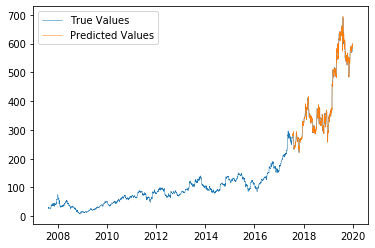

In [47]:
plt.plot(companyDf["Date"],companyDf["Adj. Close"],label = "True Values",linewidth = 0.5)
plt.plot(df["Dates"],df["PredictedValues"] , label = "Predicted Values",linewidth = 0.5)
plt.legend()

